In [1]:
import pandas as pd


# Load the data to the App

In [101]:
df_matric = pd.read_excel("""C:\\Users\\tetyana.lookutova\\Downloads\\1-Zyelabs\\2016_Matric_Schools_Report.xlsx""")

In [123]:
df_matric.head(3)

,emis,centre_no,name,wrote_2014,passed_2014,wrote_2015,passed_2015,wrote_2016,passed_2016
0,0.0,4021043,MBUMBAZI SENIOR SECONDARY SCHOOL,0.0,0.0,0.0,0.0,38,11
1,700888031.0,8888031,VINE CHRISTIAN COLLEGE,0.0,0.0,0.0,0.0,3,0
2,0.0,5512000,UGU CENTRE 1,0.0,0.0,0.0,0.0,32,29


In [103]:
df_matric = df_matric.fillna(0)

In [122]:
df_matric["emis"]=df_matric["emis"].apply(str)

In [126]:
df_matric["centre_no"]=df_matric["centre_no"].apply(str)

In [133]:
df_matric["wrote_2014"]=df_matric["wrote_2014"].apply(int)

In [134]:
df_matric["passed_2014"]=df_matric["passed_2014"].apply(int)

In [135]:
df_matric["wrote_2015"]=df_matric["wrote_2015"].apply(int)

In [136]:
df_matric["passed_2015"]=df_matric["passed_2015"].apply(int)

In [137]:
df_matric["wrote_2016"]=df_matric["wrote_2016"].apply(int)

In [138]:
df_matric["passed_2016"]=df_matric["passed_2016"].apply(int)

In [139]:
s = df_matric.head(1).to_dict(orient='records')

In [140]:
s[0]

{'centre_no': '4021043',
 'emis': '0.0',
 'name': 'MBUMBAZI SENIOR SECONDARY SCHOOL',
 'passed_2014': 0,
 'passed_2015': 0,
 'passed_2016': 11,
 'wrote_2014': 0,
 'wrote_2015': 0,
 'wrote_2016': 38}

In [162]:
import urllib.request

import sys
import requests
from urllib.request import urlopen


In [ ]:
l = len(df_matric)
for i in range(0,l):
    s = df_matric[i:i+1].to_dict('records')
    r = requests.post('http://127.0.0.1:8000/matric/new/', data = s[0])
    if r.status_code != 200:
        print(s[0])

# Analysis of the data

In [191]:
pd.options.mode.chained_assignment = None  # to not make too many copies

In [165]:
df_matric_an = df_matric.copy()

In [170]:
df_matric_an.is_copy = False

In [171]:
df_matric_an['pass_rate2014'] = 0

In [192]:
df_matric_an['pass_rate2014'].loc[df_matric_an['wrote_2014']>0] = df_matric_an['passed_2014']/ df_matric_an['wrote_2014']

In [173]:
df_matric_an['pass_rate2015'] = 0

In [193]:
df_matric_an['pass_rate2015'].loc[df_matric_an['wrote_2015']>0] = df_matric_an['passed_2015']/ df_matric_an['wrote_2015'] 

In [175]:
df_matric_an['pass_rate2016'] = 0

In [194]:
df_matric_an['pass_rate2016'].loc[df_matric_an['wrote_2016']>0] = df_matric_an['passed_2016']/ df_matric_an['wrote_2016'] 

In [184]:
pass_rate_2014 = df_matric_an['pass_rate2014'].describe()

In [185]:
pass_rate_2014

count    6224.000000
mean        0.705035
std         0.251563
min         0.000000
25%         0.578125
50%         0.757820
75%         0.901017
max         1.000000
Name: pass_rate2014, dtype: float64

In [187]:
pass_rate_2015 = df_matric_an['pass_rate2015'].describe()

In [188]:
pass_rate_2015

count    6224.000000
mean        0.675175
std         0.253773
min         0.000000
25%         0.505714
50%         0.719140
75%         0.887500
max         1.000000
Name: pass_rate2015, dtype: float64

In [189]:
pass_rate_2016 = df_matric_an['pass_rate2016'].describe()

In [190]:
pass_rate_2016

count    6224.000000
mean        0.706501
std         0.233093
min         0.000000
25%         0.550000
50%         0.751615
75%         0.897959
max         1.000000
Name: pass_rate2016, dtype: float64

## Scatter plot

In [197]:
%matplotlib inline

In [227]:
df_matric_ix = df_matric_an.reset_index()
df_matric_ix = df_matric_ix[['index','pass_rate2014', 'pass_rate2015','pass_rate2016']]

In [214]:
df_matric_ix.head(2)

,index,pass_rate2014,pass_rate2015,pass_rate2014
0,0,0.0,0.0,0.0
1,1,0.0,0.0,0.0


In [252]:
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 20),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

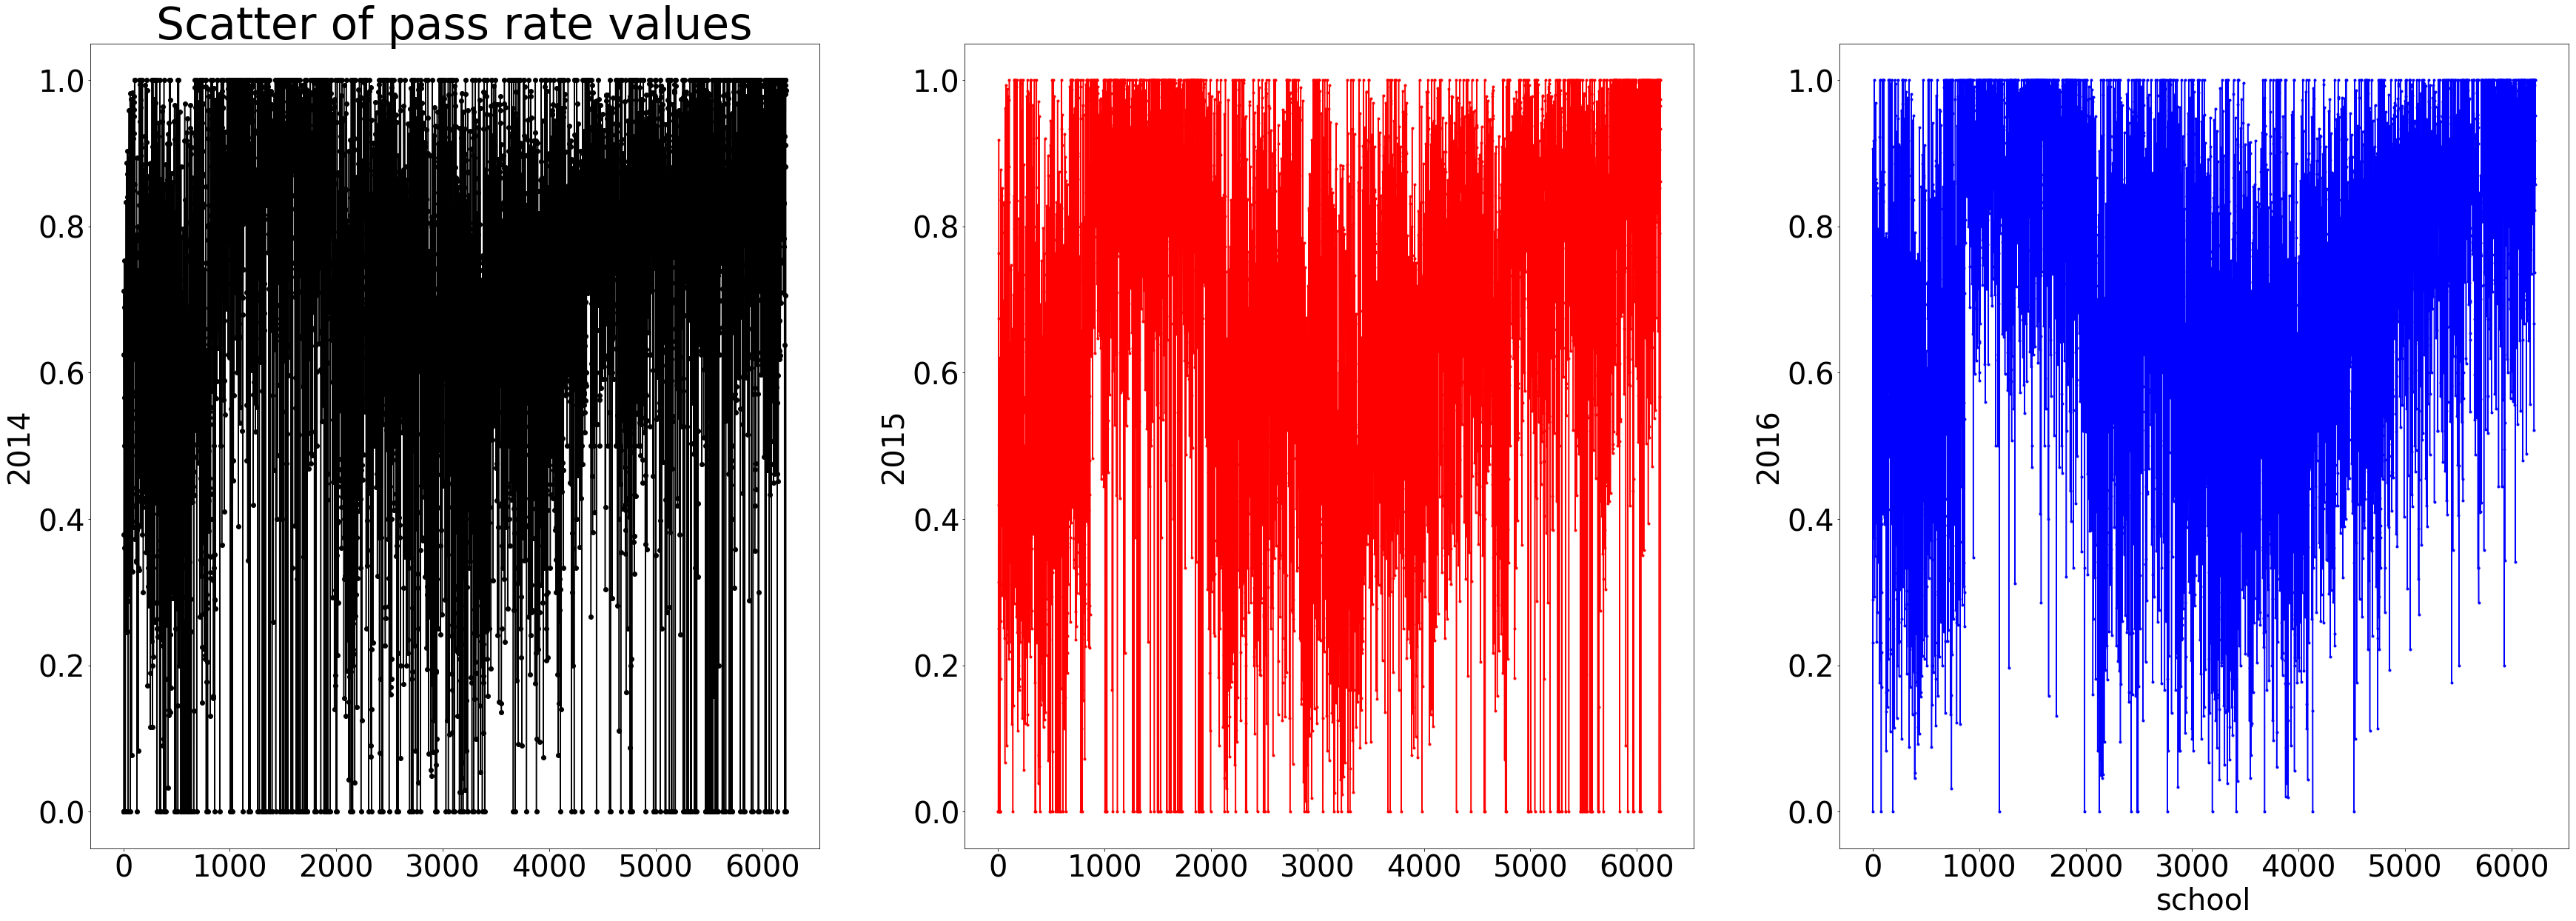

In [266]:
plt.figure(figsize=(60,20)) 

plt.subplot(1, 3, 1)
plt.plot(df_matric_ix.index, df_matric_ix['pass_rate2014'], 'ko-')
plt.title('Scatter of pass rate values', fontsize = 60)
plt.ylabel('2014', fontsize = 40)
plt.tick_params(axis='both', which='major', labelsize=40)
plt.tick_params(axis='both', which='minor', labelsize=2)

plt.subplot(1, 3, 2)
plt.plot(df_matric_ix.index, df_matric_ix['pass_rate2015'], 'r.-')
plt.ylabel('2015', fontsize = 40)
plt.tick_params(axis='both', which='major', labelsize=40)
plt.tick_params(axis='both', which='minor', labelsize=2)

plt.subplot(1, 3, 3)
plt.plot(df_matric_ix.index, df_matric_ix['pass_rate2016'], 'b.-')
plt.xlabel('school', fontsize = 40)
plt.ylabel('2016', fontsize = 40)
plt.tick_params(axis='both', which='major', labelsize=40)
plt.tick_params(axis='both', which='minor', labelsize=2)



plt.show()

## Which schools changed the most?

In [233]:
df_matric_ix['change'] = df_matric_ix[['pass_rate2014','pass_rate2015','pass_rate2016']].max(axis=1)  - df_matric_ix[['pass_rate2014','pass_rate2015','pass_rate2016']].min(axis=1)

In [236]:
df_matric_ix['trend'] = df_matric_ix['pass_rate2016'] - df_matric_ix['pass_rate2014']

In [238]:
df_matric_ix[['pass_rate2016', 'trend', 'change']].head(3)

,pass_rate2016,trend,change
0,0.289474,0.289474,0.289474
1,0.000000,0.000000,0.000000
2,0.906250,0.906250,0.906250


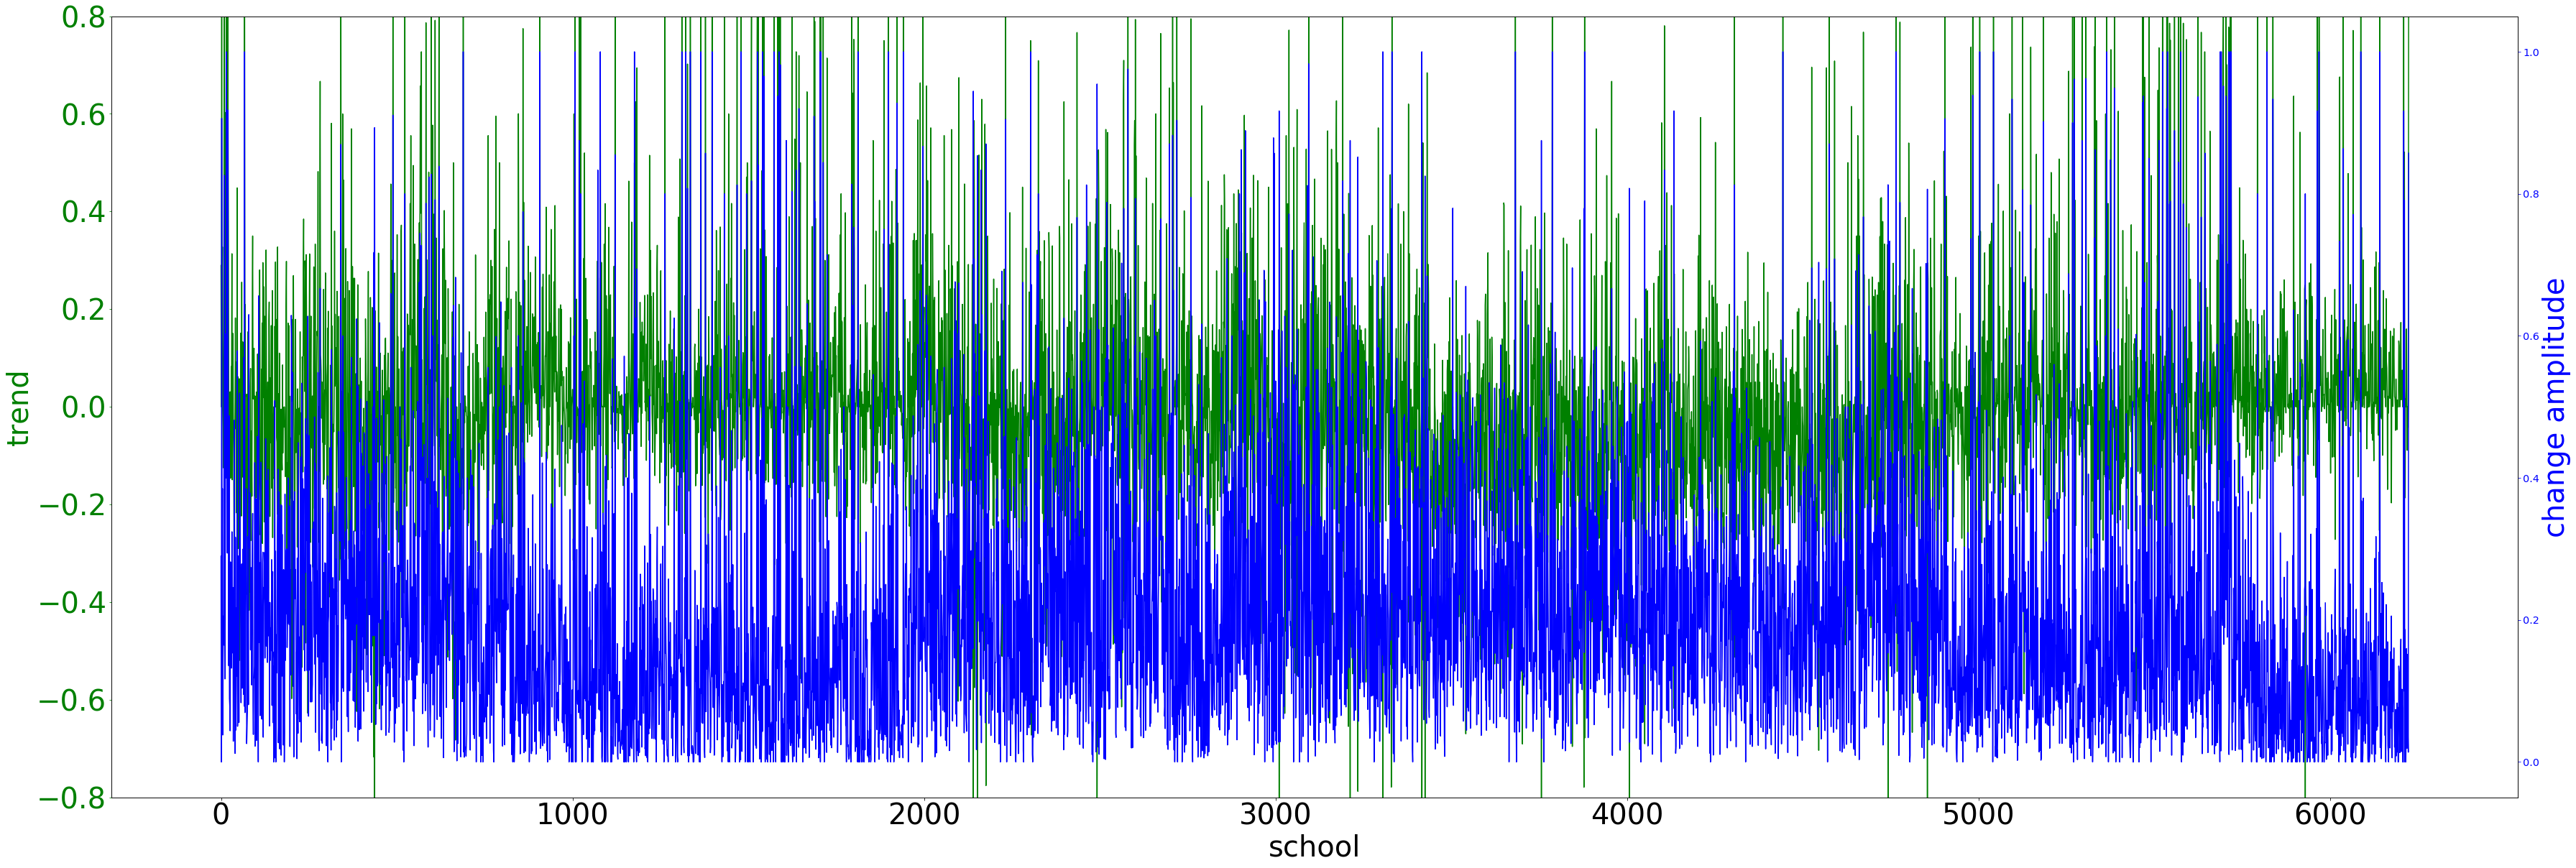

In [275]:
fig, ax1 = plt.subplots(figsize=(60,20))
ax2 = ax1.twinx()

ax1.plot(df_matric_ix.index, df_matric_ix['trend'], color='g')
ax1.set_xlabel('school', fontsize = 40)
ax1.set_ylabel('trend', fontsize = 40, color = 'g')
ax1.tick_params(axis='y', colors='g')
ax1.set_ylim([-0.8,0.8])

ax2.plot(df_matric_ix.index, df_matric_ix['change'], color='b')
ax2.set_ylabel('change amplitude', fontsize = 40, color = 'b')
ax2.tick_params(axis='y', colors='b')

for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(40) 
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(40)    

    
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(40) 
    
plt.show()